final text_encoder_type: bert-base-uncased


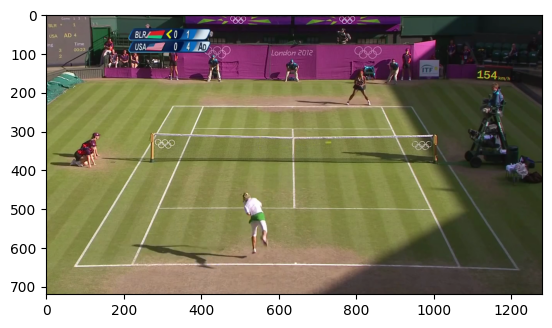

In [26]:
from groundingdino.util.inference import load_model, load_image, predict, annotate, batch_predict
import cv2
import torch
from tennis_tracker.download_data.extract_keypoints import read_json_file, write_to_jsonl_file


idx = 12
model = load_model(
    "/Users/derek/Desktop/tennis_tracker/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py", 
    "/Users/derek/Desktop/tennis_tracker/GroundingDINO/groundingdino_swint_ogc.pth"
    # "/Users/derek/Desktop/tennis_tracker/GroundingDINO/groundingdino/config/GroundingDINO_SwinB_cfg.py", 
    # "/Users/derek/Desktop/tennis_tracker/GroundingDINO/groundingdino_swinb_cogcoor.pth"
)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)
TEXT_PROMPT = "tennis player"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25
JSONL_PATH = "/Users/derek/Desktop/tennis_tracker/tennis_tracker/ball_tracking/clean_labels_V010_v2.json"

data = read_json_file(JSONL_PATH)
# model = torch.compile(model)

import matplotlib.pyplot as plt

img_path = data[list(data.keys())[idx]]["actual_path"]
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

# Inference

tensor([[0.4215, 0.7450, 0.0542, 0.2217],
        [0.6306, 0.2632, 0.0498, 0.1277],
        [0.4961, 0.2004, 0.0295, 0.0823],
        [0.3391, 0.1934, 0.0294, 0.0970],
        [0.6967, 0.2050, 0.0308, 0.0927],
        [0.0803, 0.4865, 0.0607, 0.1299]])
tensor([0.6995, 0.6369, 0.4080, 0.4061, 0.3710, 0.3541])


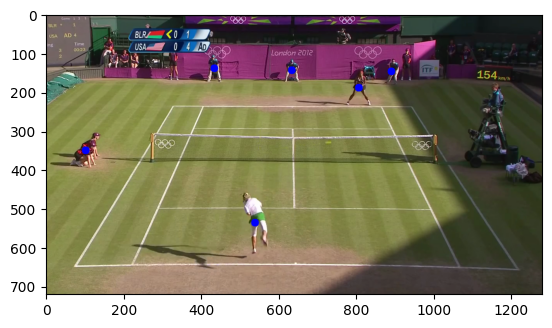

In [27]:
image_source, image = load_image(img_path)
image = image.unsqueeze(0)
boxes, logits, boxes_to_im = batch_predict(
    model=model,
    preprocessed_images=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD,
    device=device
)
print(boxes)
print(logits)

def plot_boxes(boxes, img):
    img_height, img_width, _ = img.shape
    for idx in range(boxes.shape[0]):
        box = boxes[idx]
        cv2.circle(img, (int(box[0] * img_width), int(box[1] * img_height)), 10, (0, 0, 255), -1)
    return img

img = plot_boxes(boxes, img)
plt.imshow(img)
